# PART 2 TensorFlow
# 1. TensorFlow 程式設計基礎
####  C. Alex Hu 


## Import TensorFlow & run a version check...

In [1]:
import tensorflow as tf
print(tf.__version__)

1.13.1


##  1. Build a graph...
> ###  **tf.constant** 
`tf.constant(
    value,
    dtype=None,
    shape=None,
    name='Const',
    verify_shape=False_
)`
+ Creates a constant tensor.
+ The resulting tensor is populated with values of type _dtype_, as specified by arguments _value_ and (optionally) _shape_ (see examples below).
+  https://www.tensorflow.org/api_docs/python/tf/constant

In [2]:
# Build a graph...
h  = tf.constant("Hello")
TF = tf.constant("TensorFlow!")
hTF = h + ' ' + TF

# Constant 1-D Tensor populated with value list.
fibo = tf.constant([1, 1, 2, 3, 5, 8, 13, 21]) 

# Constant 2-D tensor populated with scalar value 1.0.
# tensor = data
allOneMatrix = tf.constant(1.0, shape=[3, 3]) 

## 2. Launch the graph in a session...
> ###  **tf.Session** 
+ Class **Session** - A class for running TensorFlow operations.
https://www.tensorflow.org/api_docs/python/tf/Session
+ Defined in `tensorflow/python/client/session.py` :
    + https://github.com/tensorflow/tensorflow/blob/r1.10/tensorflow/python/client/session.py 
+ See the guides: Running Graphs > Session management, Running Graphs 
    +  https://www.tensorflow.org/api_guides/python/client
    
+ A *Session* object encapsulates the environment in which *Operation* objects are executed, and *Tensor* objects are evaluated.
+ A session may own resources, such as **tf.Variable**, **tf.QueueBase**, and **tf.ReaderBase**. It is important to release these resources when they are no longer required. 
+ To do this, either invoke the **tf.Session.close** method on the session, or use the session as a context manager.

### < Example 1 > Using the `close()` method.

In [3]:
##  < Example 1 > Using the `close()` method.
##
# Launch the graph in a session.
sess = tf.Session()

# Evaluate the tensor `c`.
print(sess.run(hTF), end='\n\n')
# 'Hello World' <= String Label (字串長值) 透過 Unicode 編碼
# b'Hello World' <= Byte Literal 透過 ASCII 編碼
print('Fibonacci numbers = ', sess.run(fibo), end='\n\n')
print('All-one 2D Tensor : \n', sess.run(allOneMatrix))

# Using the `close()` method.
sess.close()

b'Hello TensorFlow!'

Fibonacci numbers =  [ 1  1  2  3  5  8 13 21]

All-one 2D Tensor : 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


###  < Example 2 > Using the context manager.

In [4]:
##  < Example 2 > Using the context manager.
##
# Launch the graph in another session by using the 'context manager'(with ... as ...).
# with ... as ... 的好處: 不用再Session()、close()
with tf.Session() as sess:
    azm = sess.run(allOneMatrix)
    print(sess.run(hTF), end='\n\n')
    print('Fibonacci numbers = ', end='')
    print(sess.run(fibo), end='\n\n')
    
print('All-One 3D Tensor : \n', azm)

b'Hello TensorFlow!'

Fibonacci numbers = [ 1  1  2  3  5  8 13 21]

All-One 3D Tensor : 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


+ ###  Outputs in TensorFlow...

In [5]:
print(hTF)  #  Output in TensorFlow
# add_1:0 代表在做加法運算

Tensor("add_1:0", shape=(), dtype=string)


In [6]:
print(allOneMatrix)  #  Output in TensorFlow
# Const_3.0 代表 index = 3 的const (0:h, 1:tf, 2:fibo)

Tensor("Const_3:0", shape=(3, 3), dtype=float32)


In [7]:
print(fibo)  #  Output in TensorFlow

Tensor("Const_2:0", shape=(8,), dtype=int32)


> ###  `run` method
`run(
    fetches,
    feed_dict=None,
    options=None,
    run_metadata=None
)`
+ Runs operations and evaluates tensors in `fetches`.
+ The `fetches` argument may be a single graph element, or an arbitrarily nested list, tuple, namedtuple, dict, or OrderedDict containing graph elements at its leaves. 
+ Ref : https://www.tensorflow.org/api_docs/python/tf/Session

+ ### The session object may call the `run` mehod to act as an interface to run parts of the computation graph externally. For example :

In [8]:
with tf.Session() as sess:
    fibo_num = sess.run(fibo)
    
print(fibo_num)

[ 1  1  2  3  5  8 13 21]


In [9]:
import collections
MyData = collections.namedtuple('MyData', ['a', 'b'])
    
with tf.Session() as sess:
    s = tf.constant('S')
    a = tf.constant([10, 20])
    b = tf.constant([1.0, 2.0])
    v = sess.run(s)       # 'fetches' can be a singleton
    print(v, end='\n\n')
    v = sess.run(a)       # v is the numpy array [10, 20] => 'fetches' can be a list.
    print(v, end='\n\n')
    v = sess.run([a, b])  # v is a Python list with 2 numpy arrays: the 1-D array [10, 20] and the 1-D array [1.0, 2.0]
    print(v, end='\n\n')

   # 'fetches' can be arbitrary lists, tuples, namedtuple, dicts:
    v = sess.run({'k1': MyData(a, b), 'k2': [b, a]})
    print(v, end='\n\n')
   # v is a dict with
   # v['k1'] is a MyData namedtuple with 'a' (the numpy array [10, 20]) and
   # 'b' (the numpy array [1.0, 2.0])
   # v['k2'] is a list with the numpy array [1.0, 2.0] and the numpy array
   # [10, 20].

print(v)

b'S'

[10 20]

[array([10, 20]), array([1., 2.], dtype=float32)]

{'k1': MyData(a=array([10, 20]), b=array([1., 2.], dtype=float32)), 'k2': [array([1., 2.], dtype=float32), array([10, 20])]}

{'k1': MyData(a=array([10, 20]), b=array([1., 2.], dtype=float32)), 'k2': [array([1., 2.], dtype=float32), array([10, 20])]}


## 3. Create placeholders & variables ... (類似C、Java中的new)
> ###  **tf.placeholder** 
`tf.placeholder(
    dtype,
    shape=None,
    name=None
)`
+ Inserts a placeholder for a tensor that will be always fed.
+ Defined in `tensorflow/python/ops/array_ops.py` :
    + https://github.com/tensorflow/tensorflow/blob/r1.10/tensorflow/python/ops/array_ops.py 
+ See the guides: Inputs and Readers > Placeholders
    +  https://www.tensorflow.org/api_guides/python/io_ops#Placeholders
    
+ NOTE : This tensor will produce an error if evaluated. Its value must be fed using the `feed_dict` optional argument to `Session.run()`, `Tensor.eval()`, or `Operation.run()`.

In [10]:
# Build a graph...
import numpy as np
x = tf.placeholder(tf.float32, shape=(1024, 1024))
y = tf.matmul(x, x) # matrix multiply 矩陣運算
# 還沒運算，有RUN才運算

# Launch the built graph in a session...
with tf.Session() as sess:
  ## print(sess.run(y))  # ERROR: will fail because x was not fed.

  rand_array = np.random.rand(1024, 1024)
  print(sess.run(y, feed_dict={x: rand_array}))  # Will succeed.
  # 將 rand_array 餵給 X

[[263.78622 265.2841  253.18721 ... 264.1688  255.3072  259.4159 ]
 [252.49799 256.13177 246.79407 ... 253.31087 248.53468 249.79062]
 [255.51581 263.17804 254.0418  ... 266.70715 260.73618 261.33502]
 ...
 [259.16977 257.5595  255.40067 ... 261.4701  254.71327 258.3849 ]
 [246.40298 257.09607 243.44524 ... 258.16495 246.83916 251.78146]
 [242.87744 249.54826 243.93256 ... 252.44252 246.14745 244.75945]]


> ###  **tf.Variable** 
+ Class **Variable** 
https://www.tensorflow.org/api_docs/python/tf/Variable
+ Defined in `tensorflow/python/ops/variables.py` :
    + https://github.com/tensorflow/tensorflow/blob/r1.10/tensorflow/python/ops/variables.py 
+ See the guides: Variables > Variables 
    +  https://www.tensorflow.org/api_guides/python/state_ops#Variables
    
+ A variable maintains state in the graph across calls to **`run()`** method. You add a variable to the graph by constructing an instance of the class Variable.

+ The **`Variable()`** constructor requires an initial value for the variable, which can be a `Tensor` of any type and shape. 

In [11]:
# Build a graph...
# Create two variables.
w = tf.Variable(tf.random_normal([2, 3], stddev=1, seed=1))
b = tf.Variable(tf.random_normal([1, 3], stddev=1, seed=1))

# Generate a placeholder.
x = tf.placeholder(tf.float32, shape=(None, 2), name='input')
# None 代表未知的 row 數，取決於餵進來的 Data 數

# Use the variables in the graph like any Tensor.
a = tf.matmul(x, w)              #  tf.matmul(x, w)  =>  a = x * w  :  matrix multiplication
z = tf.add(a, b)                 #  tf.add(a, b)  =>  a + b
y = tf.sigmoid(z)                #  Computing Sigmoid Function... 
d = tf.constant([[0.35, 0.8]])   #  a 2d tensor for x : 1x2

# Launch the built graph in a session...
with tf.Session() as sess:
    # 將定義成 variable 的 data 初始化
    sess.run(w.initializer)
    sess.run(b.initializer)
    print(' w : \n', sess.run(w))
    print(' x = ', sess.run(d))
    print('\n a = w * x =  ', sess.run(a, feed_dict={x: sess.run(d)}))
    # 不可 feed_dict={x: d}
    print('\t b =  ', sess.run(b))
    zi = sess.run(z, feed_dict={x: sess.run(d)})
    print('\n z = w*x + b = ', zi)
    print('\n y = Sigmoid(z) = ', sess.run(y, feed_dict={x: sess.run(d)}))

Instructions for updating:
Colocations handled automatically by placer.
 w : 
 [[-0.8113182   1.4845988   0.06532937]
 [-2.4427042   0.0992484   0.5912243 ]]
 x =  [[0.35 0.8 ]]

 a = w * x =   [[-2.2381248   0.5990083   0.49584475]]
	 b =   [[-0.8113182   1.4845988   0.06532937]]

 z = w*x + b =  [[-3.049443    2.0836072   0.56117415]]

 y = Sigmoid(z) =  [[0.04524153 0.88929963 0.6367242 ]]


> ###  Q :  How to check if the answer above is correct or not?
[ Hint ] : 
+ `from math import exp`
+ #### Sigmoid Function :
    + #### $ \sigma(z) = 1\ /\ [1+exp(-z)] $

In [12]:
import numpy as np
sig = [1.0 / (1 + np.exp(-i)) for i in zi]    
sig

[array([0.04524153, 0.88929963, 0.6367242 ], dtype=float32)]

--------------------
## [ Further Reading about Computing Graph ] - `Tensor-Flow`...
+ Tom Hope, Yehezkel S. Resheff, and Itay Lieder, "Learning TensorFlow : A Guide to Building Deep Learning Systems," Chapter 2, O'Reilly, 2017.

--------------------

  
##  [ Project ] : Hand-written Digits Recognition  -  `MNIST` dataset
#### Reference :  
+ Tom Hope, Yehezkel S. Resheff, and Itay Lieder, "**Learning TensorFlow : A Guide to Building Deep Learning Systems**," Chapter 2, Example 2-2, O'Reilly, 2017. https://goo.gl/iEmehh
+ Download the code from GitHub : https://github.com/gigwegbe/Learning-TensorFlow

In [13]:
# Load tensorflow package
import tensorflow as tf
# for the old-version usage of TensorFlow, such as tensorflow.examples.tutorials.mnist
# 忽略警告訊息
old_v = tf.logging.get_verbosity()          
tf.logging.set_verbosity(tf.logging.ERROR)     

#import MNIST dataset 
from tensorflow.examples.tutorials.mnist import input_data

### Loading the MNIST datasets

> + The second argument, **`one_hot=True`**, shows the data to be labeled with **one-hot encoding**.

In [14]:
DATA_DIR = "./data"
mnist = input_data.read_data_sets(DATA_DIR, one_hot=True)

Extracting ./data\train-images-idx3-ubyte.gz
Extracting ./data\train-labels-idx1-ubyte.gz
Extracting ./data\t10k-images-idx3-ubyte.gz
Extracting ./data\t10k-labels-idx1-ubyte.gz


> + Checking the dataset...

In [15]:
print(" mnist.train.images.shape :\t ", mnist.train.images.shape)
print(" mnist.train.labels.shape :\t ", mnist.train.labels.shape)
print(" mnist.validation.images.shape : ", mnist.validation.images.shape)
print(" mnist.validation.labels.shape : ", mnist.validation.labels.shape)
print(" mnist.test.images.shape :\t ", mnist.test.images.shape)
print(" mnist.test.labels.shape :\t ", mnist.test.labels.shape)

# 將 70000 筆拆成 train:55000、Validation:5000、Test:10000
# train完後會做validation

 mnist.train.images.shape :	  (55000, 784)
 mnist.train.labels.shape :	  (55000, 10)
 mnist.validation.images.shape :  (5000, 784)
 mnist.validation.labels.shape :  (5000, 10)
 mnist.test.images.shape :	  (10000, 784)
 mnist.test.labels.shape :	  (10000, 10)


In [16]:
print('mnist.train.images[0] : \n', \
      ' min = ', min(mnist.train.images[0]), \
      ' max = ', max(mnist.train.images[0]))

mnist.train.images[0] : 
  min =  0.0  max =  0.9960785


In [17]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

### Setting the parameters

In [21]:
# Initializing some parameters...
# Hyperparameters
Learning_Rate = 0.5
NUM_STEPS = 1000
MINIBATCH_SIZE = 128
# total data = 1000*128 = 128,000 但 run 的時候是 55,000 筆資料在跑，相當於 run 128,000/55,000 = 2.3個 epoch
Display_Step = 100
# 每跑100次輸出一次，確認程式正在執行中、確認目前狀態
 
# Network Parameters
Node_hidden_1 = 256   # Number of Neurons in Hidden layer 1 
Node_hidden_2 = 128   # Number of Neurons in Hidden layer 2
Node_Inputs = 784     # Number of MNIST data input (Each image shape: 28*28 pixels)
Node_Outputs = 10     # Number of output classes (digits 0 ~ 9)

## Building a graph...

### < Forward Propagation >
>+ The image, **X** : a placeholder, supplied when running the computation graph. 
+ The size **[None, 784]** : 
    + **784** (= 28x28 pixels) is the size of each image, 
    + **None** means not currently specifying the number of these images used each time.

In [22]:
# Each Input Image, X, with 28*28 (= 784) pixels 為 2D tensor (由.shape得知)
X = tf.placeholder(tf.float32, [None, Node_Inputs]) # Node_Inputs = 784

# y_true : the training labeled dataset 
y_true = tf.placeholder(tf.float32,[None, Node_Outputs]) # Node_Outputs = 10

In [23]:
# Initializing Weights & Biases for Nodes in All Hidden Layers 
def weight_variable(shape):
    """ This specifies the weights for either fully connected or convolutional layers 
       of the network. They are initialized randomly using a truncated normal distribution 
       with a standard deviation of .1. """
    initial = tf.truncated_normal(shape, stddev=0.1) 
    return tf.Variable(initial)

def bias_variable(shape):
    """ This defines the bias elements in either a fully connected or a convolutional layer. 
        These are all initialized with the constant value of .1. """
    initial = tf.constant(0.1, shape=shape) 
    return tf.Variable(initial)

> + **Building a Fully-Connected Deep Network with 2 Hidden Layers**
    + Model Outputs for Prediction without Activation-Function Processing

In [24]:
# Building a Fully-Connected Deep Network
def full_layer(inputs, size):
    in_size = int(inputs.get_shape()[1]) 
    W = weight_variable([in_size, size]) 
    b = bias_variable([size])
    return tf.add(tf.matmul(inputs, W), b)

In [25]:
##  Dropout for regularization in order to prevent overfitting...
##  [ The parameter 'keep_prob' ] :  
##     - is the fraction of the neurons to keep working at each step
##     - if 'keep_prob' = 1.0, it means no dropout at all.

keep_prob = tf.placeholder(tf.float32)  

# < Hidden Layer 1 >
layer_1_drop = tf.nn.dropout(X, keep_prob=keep_prob)
#   Activation Function : ReLU
layer_1_Outputs = tf.nn.relu(full_layer(layer_1_drop, Node_hidden_1))

# < Hidden Layer 2 >
layer_2_drop = tf.nn.dropout(layer_1_Outputs, keep_prob=keep_prob)
#   Activation Function : ReLU
layer_2_Outputs = tf.nn.relu(full_layer(layer_2_drop, Node_hidden_2))  

# < Output Layer >
output_drop = tf.nn.dropout(layer_2_Outputs, keep_prob=keep_prob)
# Without Activation Function
y_pred = full_layer(output_drop, Node_Outputs)  

### < Back-propagation >
> + Activation Function for **`Model-Output Prediction`** : **Softmax** 
    + `tf.nn.softmax_cross_entropy_with_logits(logits=y_pred, labels=y_true)`
+ Loss function : **Cross entropy with logits**
+ Optimizer : **Gradient Descent** with the method **`minimize()`**
    + [ Note ] : 0.5 is the learning rate
+ Computing the **Accuracy Score**

In [26]:
# Computing the loss scores with Categorical Cross Entropy 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred, labels=y_true))
# softmax_cross_entropy_with_logits 在做 => 各自Data計算 -ylogy - (1-y)log(1-y)
# reduce mean => 1/N * (各自 Data 的 softmax_cross_entropy_with_logits 加總)

# Gradient Descent Optimizer with Learning_Rate = 0.5
gd_step = tf.train.GradientDescentOptimizer(Learning_Rate).minimize(cross_entropy)

# Computing Accuracy Scores...
correct_mask = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
# tf.argmax => 找出最大值所在之 index

accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))
# cast => 強制轉換 correct_mask 的 布林值型態 為 浮點數型態

### Launching the graph...

In [27]:
with tf.Session() as sess:
    
    # Training Process...
    sess.run(tf.global_variables_initializer())
    # 不用一個一個初始化
    
    # Outputs for the history of training & validation 
    loss = []
    accu = []
    val_loss = []
    val_accu = []
    
    ##  mnist.test.validation.shape : (5000, 784)
    X_val = mnist.validation.images.reshape(5, 1000, 784)
    ##  mnist.test.validation.shape : (5000, 10)
    Y_val = mnist.validation.labels.reshape(5, 1000, 10)   

    for i in range(NUM_STEPS):
        batch_xs, batch_ys = mnist.train.next_batch(MINIBATCH_SIZE)
        sess.run(gd_step, feed_dict ={X: batch_xs, 
                                      y_true: batch_ys,
                                      keep_prob: 0.5})
        
        if (i+1) % Display_Step == 0:
            # Calculate batch loss and accuracy
            loss_temp, accu_temp = sess.run([cross_entropy, accuracy], 
                                            feed_dict={X: batch_xs, 
                                                       y_true: batch_ys,
                                                       keep_prob: 1.0})
            loss.append(loss_temp)
            accu.append(accu_temp)
        
        # Validating Process...
            v_loss, v_accu = 0., 0.
            for j in range(5):
                v_l, v_a = sess.run([cross_entropy, accuracy], 
                                            feed_dict={X: X_val[j], 
                                                       y_true: Y_val[j],
                                                       keep_prob: 1.0})
                v_loss += v_l 
                v_accu += v_a
            val_loss.append(v_loss/5)
            val_accu.append(v_accu/5)

            print("Step " + str(i+1).rjust(4) + \
                  " : Loss = " + "{:.4f}".format(loss_temp) + \
                  ", Accuracy = " + "{:.3f}".format(accu_temp) + \
                  " ; Val_Loss = " + "{:.4f}".format(v_loss/5) + \
                  ", Val_Accuracy = " + "{:.3f}".format(v_accu/5))

    print("\n Computing the test accuracy ... ", end = " ")
    
    ##  ------------------------------------------------------------------
    ##  Split the test procedure into 10 blocks of 1,000 images each. 
    ##  Doing this is important mostly for much larger datasets.
    ##  ------------------------------------------------------------------
    ##  mnist.test.images.shape : (10000, 784)
    X_test = mnist.test.images.reshape(10, 1000, 784) 
    ##  mnist.test.labels.shape : (10000, 10)
    Y_test = mnist.test.labels.reshape(10, 1000, 10)   
    
    test_loss = np.mean([sess.run(cross_entropy,
                                  feed_dict={X: X_test[i], 
                                             y_true: Y_test[i], 
                                             keep_prob: 1.0}) 
                                  for i in range(10)])
    test_accu = np.mean([sess.run(accuracy,
                                  feed_dict={X: X_test[i], 
                                             y_true: Y_test[i], 
                                             keep_prob: 1.0}) 
                                  for i in range(10)])
    print(" Done !!! ")

Step  100 : Loss = 0.5044, Accuracy = 0.836 ; Val_Loss = 0.5512, Val_Accuracy = 0.837
Step  200 : Loss = 0.4144, Accuracy = 0.883 ; Val_Loss = 0.4040, Val_Accuracy = 0.892
Step  300 : Loss = 0.3607, Accuracy = 0.875 ; Val_Loss = 0.3747, Val_Accuracy = 0.891
Step  400 : Loss = 0.2990, Accuracy = 0.914 ; Val_Loss = 0.3167, Val_Accuracy = 0.906
Step  500 : Loss = 0.2270, Accuracy = 0.938 ; Val_Loss = 0.2810, Val_Accuracy = 0.920
Step  600 : Loss = 0.2550, Accuracy = 0.922 ; Val_Loss = 0.2421, Val_Accuracy = 0.935
Step  700 : Loss = 0.1613, Accuracy = 0.953 ; Val_Loss = 0.2265, Val_Accuracy = 0.937
Step  800 : Loss = 0.2777, Accuracy = 0.898 ; Val_Loss = 0.2237, Val_Accuracy = 0.939
Step  900 : Loss = 0.1146, Accuracy = 0.984 ; Val_Loss = 0.2100, Val_Accuracy = 0.944
Step 1000 : Loss = 0.1527, Accuracy = 0.953 ; Val_Loss = 0.2060, Val_Accuracy = 0.940

 Computing the test accuracy ...   Done !!! 


In [28]:
print(" [ Test  Accuracy ] : {}".format(test_accu) +
      "\n [ Test Loss Score ] : {}".format(test_loss))

 [ Test  Accuracy ] : 0.9394000172615051
 [ Test Loss Score ] : 0.20924611389636993


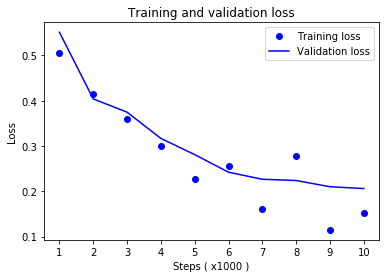

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

steps = range(1, len(accu) + 1)

# "bo" is for "blue dot"
plt.plot(steps, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(steps, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Steps ( x1000 )')
plt.ylabel('Loss')
plt.xticks(steps)
plt.legend()

plt.show()

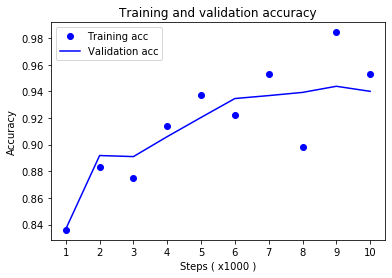

In [30]:
plt.clf()   # clear figure

plt.plot(steps, accu, 'bo', label='Training acc')
plt.plot(steps, val_accu, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Steps ( x1000 )')
plt.ylabel('Accuracy')
plt.xticks(steps)
plt.legend()

plt.show()

----------------------
## *Q : Try to increasing more steps or rerunning the training-and-testing process for the example above. What happens?*
----------------------

> ## Two useful websites from Google :
+ ### [ Colaboratory ] : 
https://colab.research.google.com/notebooks/welcome.ipynb
+ ### [ Google Codelabs 學習網站 ] : TensorFlow and deep learning, without a PhD
https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/#0